In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Dataset loader for IRIS
from sklearn.datasets import load_iris

from sklearn.model_selection import StratifiedShuffleSplit

# Support vector machine - learns coefficients of a function basis-set 
# (Gaussians, for example) in order to construct a decision boundary.
from sklearn.svm import SVC

In [2]:
iris_data = load_iris()

x = iris_data['data']
y = iris_data['target']

# This data is not shuffled (labels are 0,0,0,0,...,1,1,1,1,...,2,2,2,2)
# So let's shuffle it with a fixed random seed
np.random.seed(12345)
idx = np.random.permutation(x.shape[0])
x = x[idx]
y = y[idx]

print("Dataset has %d rows, %d features" % (x.shape[0], x.shape[1]))

Dataset has 150 rows, 4 features


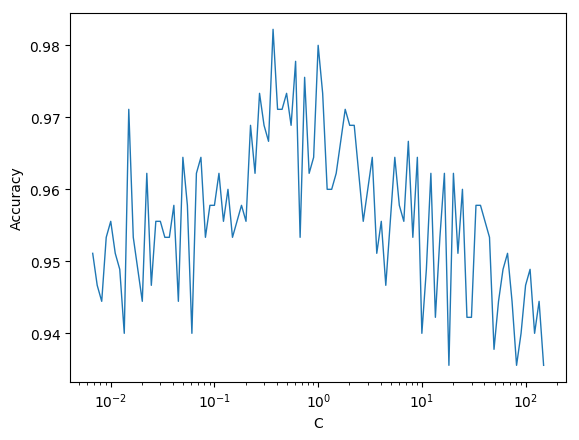

In [5]:
# Make a train/test split
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.3)
split.get_n_splits(x,y)

# Get a set of parameter values to try
param_vals = [np.exp(i) for i in np.arange(-5,5.1,0.1)]
scores = []

# Try each parameter value
for C in param_vals:
    cvs = []
    
    # Get the cross-validation score for each parameter value
    for train_idx, test_idx in split.split(x,y):
        train_x = x[train_idx]
        train_y = y[train_idx]

        test_x = x[test_idx]
        test_y = y[test_idx]

        classifier = SVC(C=C, gamma=1)

        classifier.fit(train_x, train_y)

        p = classifier.predict(test_x)

        cvs.append(np.mean(p==test_y))
    
    scores.append(np.mean(cvs))
    
plt.plot(param_vals, scores)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

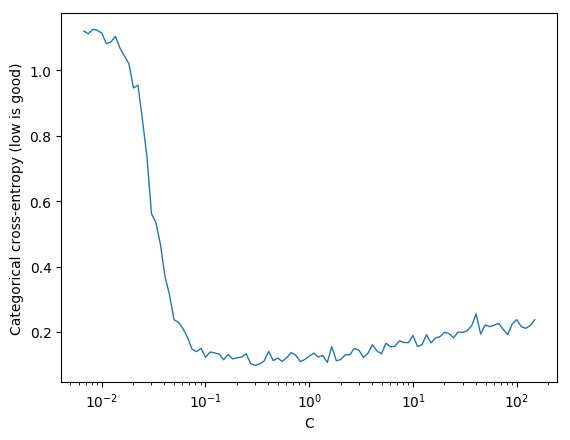

In [8]:
# If we use the cross-entropy we will get a more finely-resolved score

split = StratifiedShuffleSplit(n_splits=10, test_size = 0.3)
split.get_n_splits(x,y)

# Get a set of parameter values to try
param_vals = [np.exp(i) for i in np.arange(-5,5.1,0.1)]
scores = []

# Try each parameter value
for C in param_vals:
    cvs = []
    
    # Get the cross-validation score for each parameter value
    for train_idx, test_idx in split.split(x,y):
        train_x = x[train_idx]
        train_y = y[train_idx]

        test_x = x[test_idx]
        test_y = y[test_idx]
        
        classifier = SVC(C=C, gamma=1, probability=True)

        classifier.fit(train_x, train_y)

        p = classifier.predict_proba(test_x)
        
        # Cross-entropy = -log(p_i[y_i])
        idx = np.arange(test_y.shape[0])
        cross_entropy = -np.mean(np.log(p[idx, test_y[idx]]))
        cvs.append(cross_entropy)
    
    scores.append(np.mean(cvs))
    
plt.plot(param_vals, scores)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Categorical cross-entropy (low is good)")
plt.show()

In [14]:
# We can do this in multiple dimensions, but it starts to get expensive if we do it exhaustively

split = StratifiedShuffleSplit(n_splits=10, test_size = 0.3)
split.get_n_splits(x,y)

# Get a set of parameter values to try
C_vals = [np.exp(i) for i in np.arange(-5,7.4,0.5)]
gamma_vals = [np.exp(i) for i in np.arange(-7,5.4,0.5)]
scores = []

# Try each parameter value
for gamma in gamma_vals:
    for C in C_vals:
        cvs = []

        # Get the cross-validation score for each parameter value
        for train_idx, test_idx in split.split(x,y):
            train_x = x[train_idx]
            train_y = y[train_idx]

            test_x = x[test_idx]
            test_y = y[test_idx]

            classifier = SVC(C=C, gamma=gamma, probability=True)

            classifier.fit(train_x, train_y)

            p = classifier.predict_proba(test_x)

            # Cross-entropy = -log(p_i[y_i])
            idx = np.arange(test_y.shape[0])
            cross_entropy = -np.mean(np.log(p[idx, test_y[idx]]))
            cvs.append(cross_entropy)

        scores.append(np.mean(cvs))

scores = np.array(scores).reshape((len(C_vals), len(gamma_vals)))
xx, yy = np.meshgrid(C_vals, gamma_vals)

In [21]:
# Grab the best parameters

bestidx = np.argmin(scores)
bestC = C_vals[bestidx%len(C_vals)]
bestg = gamma_vals[bestidx//len(C_vals)]

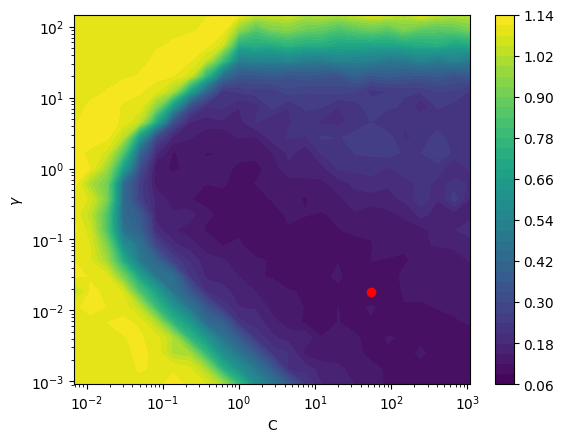

In [23]:
# Show the hyperparameter score surface

plt.contourf(xx,yy,scores,40)
plt.colorbar()
plt.xlabel("C")
plt.ylabel("$\\gamma$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(bestC, bestg, c='red')
plt.show()